# A1. Analytics Report
By: Jeronimo De La Ossa
## Where should the European Sports Co. expand and why?


## Problem 1: How to pick the right Location?
### Problem statement
To identify the correct location any company should expand to, we must first look into the potential customers for their product or service.
This is vital information, because before expanding to a new location, the business should have a clear idea on the number of customers as well as their characteristics.
### Understanding
For us to answer this question we need information about the Population size, their Age Structure, the percentage of the Urban population.
In addition any information on consumer behavior, demographic trends, and other variables that might help understand the end user.

## Problem 2: Economic state of the country
### Problem statement
Another important factor of that plays a role in the decision making is the economic state of the country. For any business to be profitable, we need a stable and powerful economy, specially if it plans to open a new business.
### Understanding
To answer this, we should look into aspects of the country like the GDP, Local Purchasing Power, Development Status, and other measures such as Phones per 1000 or the Price of the McMeal.

## Problem 3: Tax rates
### Problem statement
For any multinational, understanding the implications for business related procedures in terms of government policies is key.
Many implications come along when countries have very specific laws in regards to foreign companies.

### Understanding
The world bank indicators can shed light towards the business related implications each country has.\
These can be compared to other countries in order to decide which one fits best the Sporting Company in hand.

# Results
## Why Mexico?

After trimming down the list of potential countries, we ended up with a list of ten potential countries
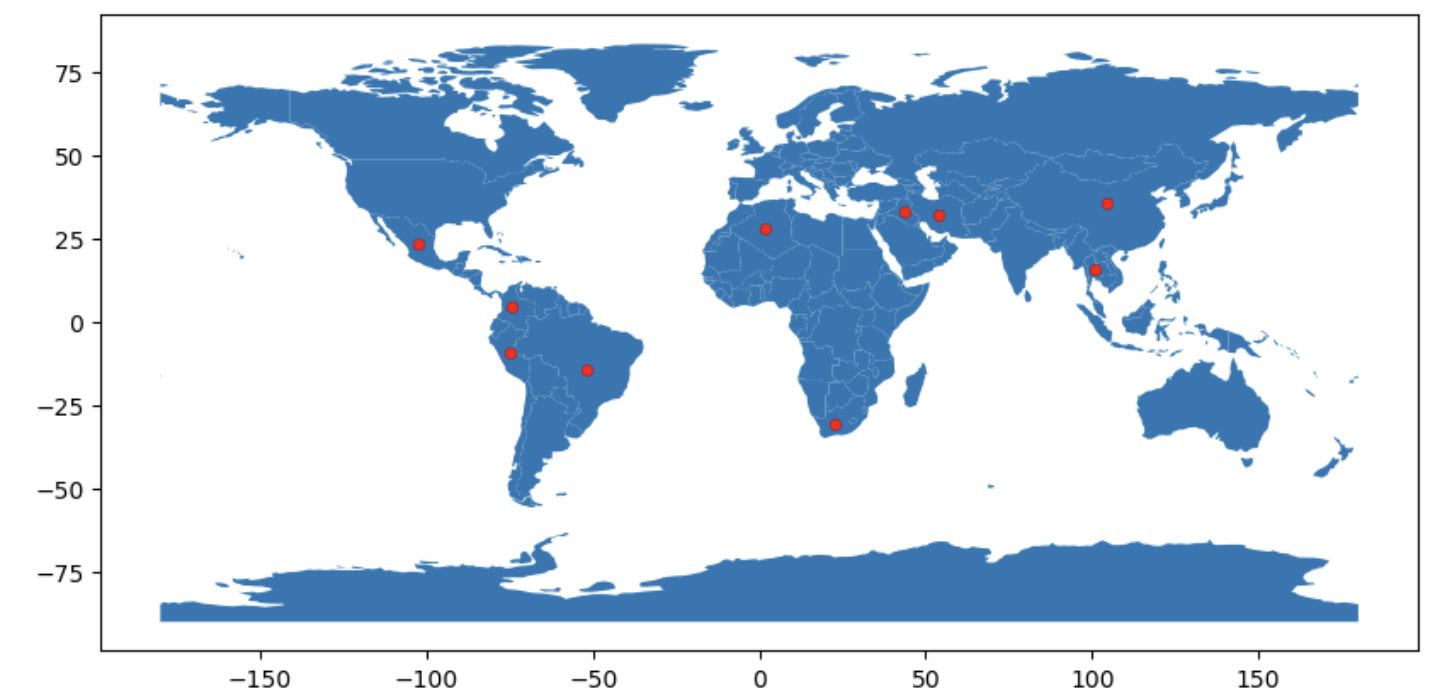

These countries were then evaluated individually to determine which one of them all had the best potential market, best economical stability and tax rates for the business environment.

Taking in consideration the different variables that decribe the economic and demographic situation of a country such as 
Human Development Index, GDP ($ per capita), Local Purchasing Power Index, Quality of Life Index, and the Cost of Living, we assigned them a ranking order.

This ranking was then group by continent which showed that South America had the best potential

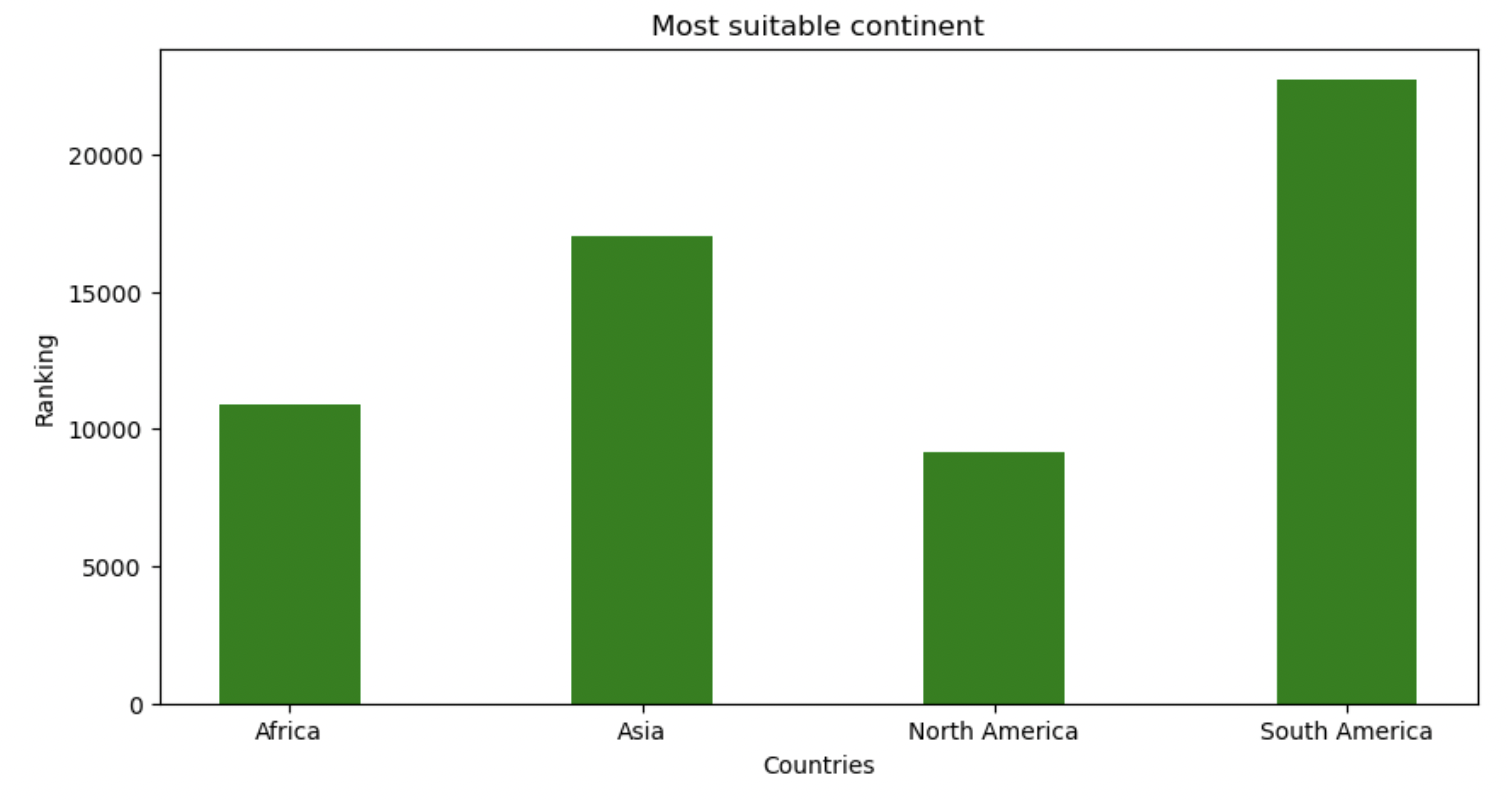




Taking into account that all countries left from North and South America belonged to the same region, Latin America,\
we looked further into how suitable each one of them was individually
<br><br>
Having the **1st, 3rd, 6th, 7th, and 8th** countries at the top, gives the Sporting company in hand a\
huge potential to test the market in Mexico, whose **real addressable population** (living in urban areas between\
15 and 65 years of age) as well as their Human Development Index surpasses most of the countries in the list.
<br><br>
While possibilities are endless for this company in terms of expansion, after learning about the region's \
cultural behaviour, we suggest an expansion to the South American continent, specifically to Brazil.\
The reason behind this being the enourmous real addressable population in the region as well as the aggregate \
of the different variables ranked in the graph before.


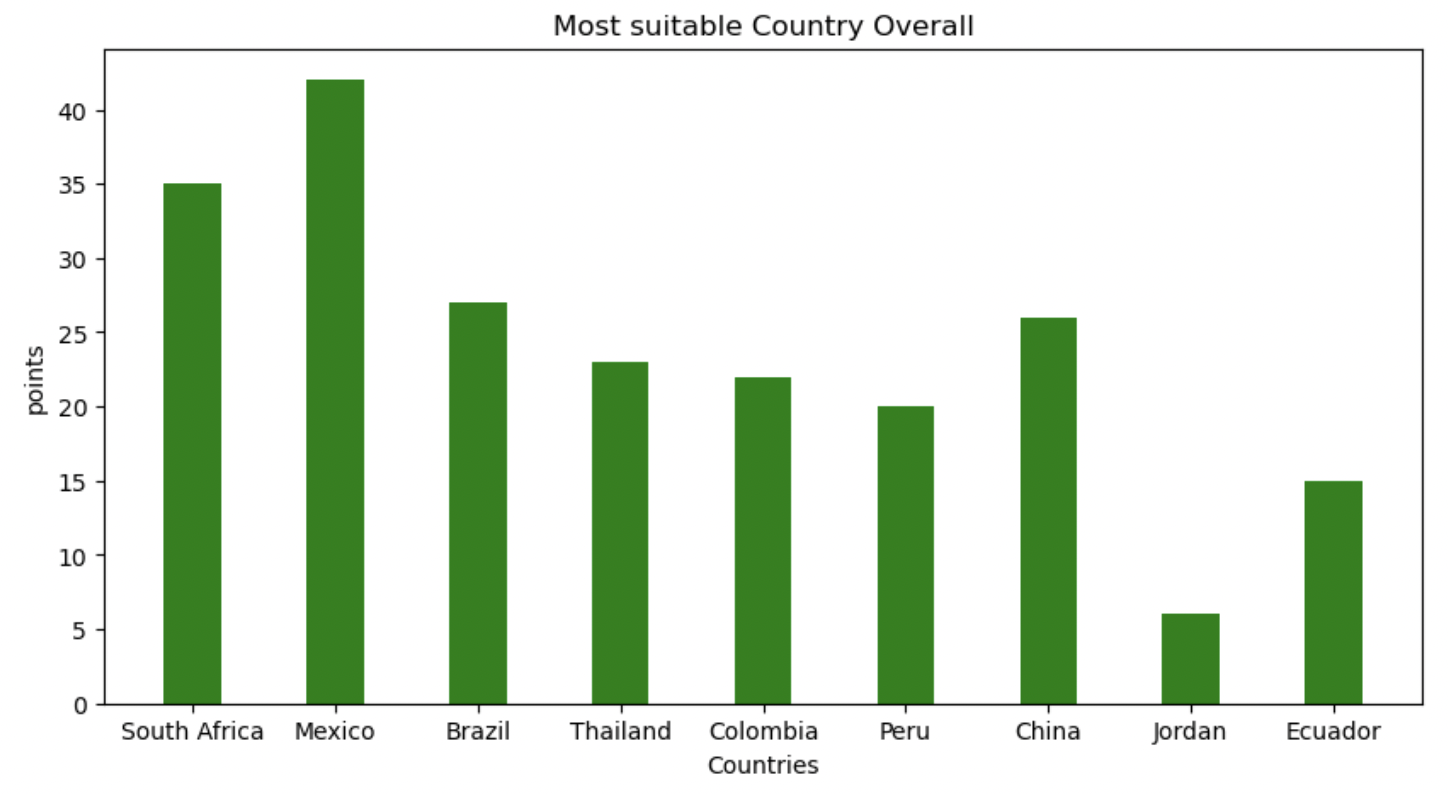





# Assumptions made

Due to the limited information about the company and limited information on different countries 
we had to generalize certain factors

The following are the assumtions made on the company we are working for:
- The company wishes to expand to a country with potential expansion to the region
- It is a Sportings Goods Company


Some assumptions about our taget market:
- People between 15-65 years old
- They live in Urban Areas
- The country should be developing, due to the high competition in already developed countries, and the how quality of life in under developed countries
- It should be considered a High income or upper middle income group


For the tax rates, we assumed that the Data in the indicators file was up to date, or at least that the information in hand had a resemblance from the current reality of each country.

# Limitations

The data provided included many limitations, many of them including outdated data, different information in different files, even cases where the information label did not aligned with the values provided.

## Problem 1: How to pick the right Location?
When tackling the market size problem, many cases had different population sizes for the same CountryWhen tackling the market size problem, many cases had different population sizes for the same Country

## Problem 2: Economic State of the Country
Many indices had no explanation on how they were calculated, so having to make interpretations with a degree of self judgement

## Problem 3: Tax Rates
- The Data provided, had no information after 2015 and in some cases farther back.
- Country names were different, which in some cases had to be transformed
 - Many missing values for several countries on different indicators

# Data

## Dataset 1
### World Bank Folder

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

cost_of_living = pd.read_csv('./World Bank/countries-dataset-2020/Cost of living index by country 2020.csv')
quality_of_life = pd.read_csv('./World Bank/countries-dataset-2020/Quality of life index by countries 2020.csv')
property_price = pd.read_csv('./World Bank/countries-dataset-2020/Properties price index by countries 2020.csv')
density = pd.read_csv('./World Bank/countries-dataset-2020/Pupulation density by countries.csv')
age = pd.read_csv('./World Bank/countries-dataset-2020/Coutries age structure.csv')
income = pd.read_csv('./World Bank/world-development-indicators/Country.csv')


developing = pd.read_csv('./World Bank/list_of_developed_or_developing_countries.csv')
developed  = pd.read_csv('./World Bank/list_of_developed_countries.csv')

#found continent
path3 = './World Bank/Countries_and_continents_of_the_world.csv'
conti = pd.read_csv(path3)

# Population 2020 has updated info
pop = './World Bank/population-by-country-2020/population_by_country_2020.csv'
urban_df = pd.read_csv(pop)


In [370]:
# subsetting to get country, cost of living and local purchasing power
cost_of_living = cost_of_living[['Country','Cost of Living Index','Local Purchasing Power Index']]
cost_of_living.head()

quality_of_life = quality_of_life[['Country','Quality of Life Index']]
quality_of_life.head()



,Country,Quality of Life Index
0,Denmark,192.67
1,Switzerland,192.01
2,Finland,190.22
3,Australia,186.21
4,Netherlands,183.67


In [371]:
age.head()
countries_table = pd.merge(cost_of_living, age, how="left", on= 'Country')
countries_table = pd.merge(countries_table, quality_of_life, how='left', on='Country')

In [372]:
joined = pd.concat([developed, developing], axis = 0)
joined.head()
joined = joined[['Country Name','Human Development Index','Development Status']]

In [373]:

big_table = pd.merge(joined, countries_table, how='left', left_on='Country Name',right_on='Country')
big_table.drop('Country', inplace=True, axis=1)
big_table.head()
# Drop duplicates of country names
big_table['Country Name'].value_counts()
big_table.drop_duplicates(subset='Country Name', keep='first', inplace=True)
big_table = big_table[big_table['Development Status']!='Developed']

In [374]:
conti.head()
#Getting the relevant columns from this DataFrame and subsetting for not europe
"""
'Country Name',
'Continent',
'Phones (per 1000)',
'latitude',
'longitude',
'GDP ($ per capita)',
'Population 2020'
"""
conti = conti[['Country Name',
      'Continent',
      'Phones (per 1000)',
      'GDP ($ per capita)',
      'Population',
      'latitude',
      'longitude']].query("Continent != 'Europe'")
conti.head()

,Country Name,Continent,Phones (per 1000),GDP ($ per capita),Population,latitude,longitude
0,Afghanistan,Asia,"3,2",700.0,31056997.0,33.939110,67.709953
3,Algeria,Africa,"78,1",6000.0,32930091.0,28.033886,1.659626
4,American Samoa,Oceania,"259,5",8000.0,57794.0,-14.270972,-170.132217
6,Angola,Africa,"7,8",1900.0,12127071.0,-11.202692,17.873887
7,Anguilla,North America,"460,0",8600.0,13477.0,18.220554,-63.068615


In [375]:
# this table contains Developing Countries
desarrollo = big_table.query("`Development Status` != 'Developed'")
desarrollo.info()


developped = desarrollo[desarrollo['Age 15 to 64 Years'].notna()]
developped.head()

#Here we create a column with the actual GDP of each country
conti['GDP'] = conti['GDP ($ per capita)'] * conti['Population']
conti

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 81 to 328
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country Name                  144 non-null    object 
 1   Human Development Index       139 non-null    float64
 2   Development Status            144 non-null    object 
 3   Cost of Living Index          67 non-null     float64
 4   Local Purchasing Power Index  67 non-null     float64
 5   Age 0 to 14 Years             65 non-null     object 
 6   Age 15 to 64 Years            65 non-null     object 
 7   Age above 65 Years            65 non-null     object 
 8   Quality of Life Index         27 non-null     float64
dtypes: float64(4), object(5)
memory usage: 11.2+ KB


,Country Name,Continent,Phones (per 1000),GDP ($ per capita),Population,latitude,longitude,GDP
0,Afghanistan,Asia,"3,2",700.0,31056997.0,33.939110,67.709953,2.173990e+10
3,Algeria,Africa,"78,1",6000.0,32930091.0,28.033886,1.659626,1.975805e+11
4,American Samoa,Oceania,"259,5",8000.0,57794.0,-14.270972,-170.132217,4.623520e+08
6,Angola,Africa,"7,8",1900.0,12127071.0,-11.202692,17.873887,2.304143e+10
7,Anguilla,North America,"460,0",8600.0,13477.0,18.220554,-63.068615,1.159022e+08
...,...,...,...,...,...,...,...,...
264,West Bank,Asia,"145,2",800.0,2460492.0,32.221111,35.254440,1.968394e+09
265,Western Sahara,Africa,NaN,NaN,273008.0,24.215527,-12.885834,NaN
266,Yemen,Asia,"37,2",800.0,21456188.0,15.552727,48.516388,1.716495e+10
267,Zambia,Africa,"8,2",800.0,11502010.0,-13.133897,27.849332,9.201608e+09


In [376]:
#Here we join the table with not na values
conti_develop= pd.merge(developped, conti, how='inner', on='Country Name')
conti_develop.head()

big_conti = pd.merge(conti, big_table, how='inner', on='Country Name')

#no_dup = big_conti['Country Name'].drop_duplicates()#.sum()
big_conti.drop_duplicates(subset='Country Name', keep='first', inplace=True)
big_conti.head()

,Country Name,Continent,Phones (per 1000),GDP ($ per capita),Population,latitude,longitude,GDP,Human Development Index,Development Status,Cost of Living Index,Local Purchasing Power Index,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Quality of Life Index
0,Afghanistan,Asia,"3,2",700.0,31056997.0,33.939110,67.709953,2.173990e+10,0.496,Developed/Developing,24.24,28.20,43.20%,54.20%,3%,NaN
1,Algeria,Africa,"78,1",6000.0,32930091.0,28.033886,1.659626,1.975805e+11,0.759,Developed/Developing,30.10,28.69,29.30%,64.50%,6%,NaN
2,Angola,Africa,"7,8",1900.0,12127071.0,-11.202692,17.873887,2.304143e+10,0.574,Developed/Developing,NaN,NaN,NaN,NaN,NaN,NaN
3,Armenia,Asia,"195,7",3500.0,2976372.0,40.069099,45.038189,1.041730e+10,0.760,Developed/Developing,32.84,28.00,20.00%,68.80%,11%,NaN
4,Aruba,North America,"516,1",28000.0,71891.0,12.521110,-69.968338,2.012948e+09,NaN,Developed/Developing,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
conti_develop.groupby('Continent')['Local Purchasing Power Index'].mean()

Continent
Africa           32.712353
Asia             30.097917
North America    31.079000
Oceania          33.170000
South America    30.390000
Name: Local Purchasing Power Index, dtype: float64

In [378]:
# we query for developing countries
developing=big_conti.query("`Development Status` != 'Developed'")
developing['Continent'].value_counts()
developing[developing['Quality of Life Index'].isna()==False]

,Country Name,Continent,Phones (per 1000),GDP ($ per capita),Population,latitude,longitude,GDP,Human Development Index,Development Status,Cost of Living Index,Local Purchasing Power Index,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Quality of Life Index
6,Bangladesh,Asia,"7,3",1900.0,1.473654e+08,23.684994,90.356331,2.799942e+11,0.614,Developed/Developing,32.25,33.21,28.40%,66.50%,5%,70.03
12,Brazil,South America,"225,3",7600.0,1.880782e+08,-14.235004,-51.925280,1.429395e+12,0.761,Developed/Developing,40.22,32.81,21.70%,69.70%,9%,105.65
21,China,Asia,"266,7",5000.0,1.313974e+09,35.861660,104.195397,6.569869e+12,0.758,Developed/Developing,40.04,60.88,17.70%,71.70%,11%,102.81
22,Colombia,South America,"176,2",6300.0,4.359304e+07,4.570868,-74.297333,2.746361e+11,0.761,Developed/Developing,30.66,31.12,23.50%,68.90%,8%,105.83
30,Ecuador,South America,"125,6",3300.0,1.354751e+07,-1.831239,-78.183406,4.470678e+10,0.758,Developed/Developing,40.98,36.08,28.40%,64.50%,7%,125.14
31,Egypt,Africa,"131,8",4000.0,7.888701e+07,26.820553,30.802498,3.155480e+11,0.700,Developed/Developing,29.54,22.41,33.50%,61.40%,5%,86.54
40,Georgia,Asia,"146,6",2500.0,4.661473e+06,32.165622,-82.900075,1.165368e+10,0.786,Developed/Developing,28.48,24.88,19.20%,66.00%,15%,115.95
50,India,Asia,"45,4",2900.0,1.095352e+09,20.593684,78.962880,3.176521e+12,0.647,Developed/Developing,24.58,54.30,27.80%,66.20%,6%,108.63
51,Indonesia,Asia,"52,0",3200.0,2.454527e+08,-0.789275,113.921327,7.854488e+11,0.707,Developed/Developing,37.27,25.05,27.40%,67.30%,5%,97.47
52,Iran,Asia,"276,4",7000.0,6.868843e+07,32.427908,53.688046,4.808190e+11,0.797,Developed/Developing,39.01,22.69,23.70%,70.90%,5%,74.14


In [379]:
urban_df.head()
urban_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


## Dataset 2
### Indicators

In [380]:
# this dataset has information about many indicators for each country
indicators = pd.read_csv('./World Bank/world-development-indicators/Indicators.csv')
indicators

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


In [381]:
# Select the lastest data point for the desired indicator
latest_year = indicators[indicators['Year']== '2015']
# latest_year
# ind[ind['Year']== '2015']
latest_year = indicators.query("Year == 2015")

In [382]:
tax = latest_year[latest_year['IndicatorCode']=='IC.TAX.TOTL.CP.ZS']
tax

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5641740,Arab World,ARB,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,42.885714
5641789,Caribbean small states,CSS,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,36.484615
5641836,Central Europe and the Baltics,CEB,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,39.836364
5641881,East Asia & Pacific (all income levels),EAS,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,34.617241
5641958,East Asia & Pacific (developing only),EAP,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,35.861905
...,...,...,...,...,...,...
5656170,Vietnam,VNM,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,39.400000
5656232,West Bank and Gaza,WBG,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,15.300000
5656303,"Yemen, Rep.",YEM,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,33.100000
5656380,Zambia,ZMB,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,18.600000


# Problem Solving

This section needs to guide throught the problem solving process and make it clear how the results have been derived from the data. It should also contain executable code for everything that is code based. Code cells need to be executable top-to-bottom and be well commented.

## Problem 1 & 2 Understand your potential market, along the different economic parameters from e

In [383]:
market = big_conti[['Country Name','Population','Age 15 to 64 Years']]
market

market['Age 15 to 64 Years'] = market['Age 15 to 64 Years'].str.strip('%')
market['Age 15 to 64 Years'] = market['Age 15 to 64 Years'].astype(float)

/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_13176/3658962550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market['Age 15 to 64 Years'] = market['Age 15 to 64 Years'].str.strip('%')
/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_13176/3658962550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market['Age 15 to 64 Years'] = market['Age 15 to 64 Years'].astype(float)


In [384]:
urban = urban_df[['Country (or dependency)','Population (2020)','Urban Pop %']]
# Create a column with the numeric value of the percentage of the urban population

urban.head()

,Country (or dependency),Population (2020),Urban Pop %
0,China,1440297825,61 %
1,India,1382345085,35 %
2,United States,331341050,83 %
3,Indonesia,274021604,56 %
4,Pakistan,221612785,35 %


In [385]:
urban = urban_df[['Country (or dependency)','Population (2020)','Urban Pop %']]
# Create a column with the numeric value of the percentage of the urban population
urban.head()
urban.replace('N.A.', np.nan, inplace=True)
urban['Urban Pop'] = urban['Urban Pop %'].str.strip(' %')
urban['Urban Pop'] = pd.to_numeric(urban['Urban Pop'])
urban.drop(labels='Urban Pop %',axis=1,inplace=True)
urban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Urban Pop                222 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_13176/74153370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban.replace('N.A.', np.nan, inplace=True)
/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_13176/74153370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban['Urban Pop'] = urban['Urban Pop %'].str.strip(' %')
/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_13176/74153370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [386]:
market_size = pd.merge(market, urban, how='inner', left_on='Country Name', right_on='Country (or dependency)')
market_size.head()

market_s = market_size[['Country Name',
             'Country (or dependency)',
             'Population (2020)',
             'Age 15 to 64 Years',
             'Urban Pop']]
# Convert age group and urban population into percentage
market_s['Urban Pop'] = market_s['Urban Pop']/100
market_s['Age 15 to 64 Years'] = market_s['Age 15 to 64 Years']/100
market_s.head()

/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_13176/3449488932.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_s['Urban Pop'] = market_s['Urban Pop']/100
/var/folders/pc/_nsr2wm92qq38clkkx8fh3lr0000gn/T/ipykernel_13176/3449488932.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_s['Age 15 to 64 Years'] = market_s['Age 15 to 64 Years']/100


,Country Name,Country (or dependency),Population (2020),Age 15 to 64 Years,Urban Pop
0,Afghanistan,Afghanistan,39074280,0.542,0.25
1,Algeria,Algeria,43984569,0.645,0.73
2,Angola,Angola,33032075,NaN,0.67
3,Armenia,Armenia,2964219,0.688,0.63
4,Aruba,Aruba,106845,NaN,0.44


In [387]:
market_s['real pop'] = (market_s['Population (2020)']*market_s['Urban Pop'])*market_s['Age 15 to 64 Years']
market_s.head()
# eliminating the scientific notation from real population
market_s['real pop in Millions']=round(market_s['real pop']/1000000,2)
market_s

,Country Name,Country (or dependency),Population (2020),Age 15 to 64 Years,Urban Pop,real pop,real pop in Millions
0,Afghanistan,Afghanistan,39074280,0.542,0.25,5.294565e+06,5.29
1,Algeria,Algeria,43984569,0.645,0.73,2.071013e+07,20.71
2,Angola,Angola,33032075,NaN,0.67,NaN,NaN
3,Armenia,Armenia,2964219,0.688,0.63,1.284811e+06,1.28
4,Aruba,Aruba,106845,NaN,0.44,NaN,NaN
...,...,...,...,...,...,...,...
106,Venezuela,Venezuela,28421581,0.658,NaN,NaN,NaN
107,Vietnam,Vietnam,97490013,0.698,0.38,2.585825e+07,25.86
108,Yemen,Yemen,29935468,NaN,0.38,NaN,NaN
109,Zambia,Zambia,18468257,0.527,0.45,4.379747e+06,4.38


In [388]:
market_s =market_s[['Country Name',
                    'Country (or dependency)',
                    'Population (2020)',
                    'real pop in Millions',
                    'real pop']].sort_values(by='real pop', ascending=False).head(30)

In [389]:
in_columns=['ShortName','TableName','IncomeGroup']
income = income[in_columns]

In [390]:
table = pd.merge(market_s, developing, on= 'Country Name')
table
colums = ['Country Name',
          'Country (or dependency)',
          'real pop in Millions',
          'Continent',
          'Phones (per 1000)',
          'GDP ($ per capita)',
          'GDP',
          'Human Development Index',
          'Development Status',
          'Cost of Living Index',
          'Local Purchasing Power Index',
          'Quality of Life Index',
          'latitude',
          'longitude']
table = table[colums]
table.head()        

,Country Name,Country (or dependency),real pop in Millions,Continent,Phones (per 1000),GDP ($ per capita),GDP,Human Development Index,Development Status,Cost of Living Index,Local Purchasing Power Index,Quality of Life Index,latitude,longitude
0,China,China,629.94,Asia,"266,7",5000.0,6.569869e+12,0.758,Developed/Developing,40.04,60.88,102.81,35.861660,104.195397
1,India,India,320.29,Asia,"45,4",2900.0,3.176521e+12,0.647,Developed/Developing,24.58,54.30,108.63,20.593684,78.962880
2,Brazil,Brazil,130.54,South America,"225,3",7600.0,1.429395e+12,0.761,Developed/Developing,40.22,32.81,105.65,-14.235004,-51.925280
3,Indonesia,Indonesia,103.27,Asia,"52,0",3200.0,7.854488e+11,0.707,Developed/Developing,37.27,25.05,97.47,-0.789275,113.921327
4,Mexico,Mexico,72.15,North America,"181,6",9000.0,9.670457e+11,0.767,Developed/Developing,35.72,41.81,118.55,23.634501,-102.552784


In [391]:
# Here we get the top Developing Countries classified above a low income group.

table_2 = pd.merge(table, income, how='inner', left_on= 'Country Name', right_on='ShortName')
table_2 = table_2[table_2['IncomeGroup']=='Upper middle income']

In [392]:
# Detailed information about the purchasing power and life of the potential customer base
# based on gdp, 
table_2['ranking'] = table_2['Human Development Index']+table_2['GDP ($ per capita)']+table_2['Local Purchasing Power Index']+table_2['Quality of Life Index']-table_2['Cost of Living Index']
table_2 = table_2.sort_values('ranking', ascending=False)
table_2

,Country Name,Country (or dependency),real pop in Millions,Continent,Phones (per 1000),GDP ($ per capita),GDP,Human Development Index,Development Status,Cost of Living Index,Local Purchasing Power Index,Quality of Life Index,latitude,longitude,ShortName,TableName,IncomeGroup,ranking
12,South Africa,South Africa,26.16,Africa,"107,0",10700.0,4.728077e+11,0.705,Developed/Developing,42.87,73.61,131.97,-30.559482,22.937506,South Africa,South Africa,Upper middle income,10863.415
4,Mexico,Mexico,72.15,North America,"181,6",9000.0,9.670457e+11,0.767,Developed/Developing,35.72,41.81,118.55,23.634501,-102.552784,Mexico,Mexico,Upper middle income,9125.407
2,Brazil,Brazil,130.54,South America,"225,3",7600.0,1.429395e+12,0.761,Developed/Developing,40.22,32.81,105.65,-14.235004,-51.925280,Brazil,Brazil,Upper middle income,7699.001
14,Thailand,Thailand,25.39,Asia,"108,9",7400.0,4.782738e+11,0.765,Developed/Developing,49.77,35.45,101.88,15.870032,100.992541,Thailand,Thailand,Upper middle income,7488.325
7,Iran,Iran,45.36,Asia,"276,4",7000.0,4.808190e+11,0.797,Developed/Developing,39.01,22.69,74.14,32.427908,53.688046,Iran,"Iran, Islamic Rep.",Upper middle income,7058.617
10,Colombia,Colombia,28.10,South America,"176,2",6300.0,2.746361e+11,0.761,Developed/Developing,30.66,31.12,105.83,4.570868,-74.297333,Colombia,Colombia,Upper middle income,6407.051
16,Peru,Peru,17.10,South America,"79,5",5100.0,1.443433e+11,0.759,Developed/Developing,38.65,33.95,85.46,-9.189967,-75.015152,Peru,Peru,Upper middle income,5181.519
0,China,China,629.94,Asia,"266,7",5000.0,6.569869e+12,0.758,Developed/Developing,40.04,60.88,102.81,35.861660,104.195397,China,China,Upper middle income,5124.408
28,Jordan,Jordan,5.65,Asia,"104,5",4300.0,2.539907e+10,0.723,Developed/Developing,53.67,34.88,112.40,30.585164,36.238414,Jordan,Jordan,Upper middle income,4394.333
24,Ecuador,Ecuador,7.19,South America,"125,6",3300.0,4.470678e+10,0.758,Developed/Developing,40.98,36.08,125.14,-1.831239,-78.183406,Ecuador,Ecuador,Upper middle income,3420.998


In [393]:
#top Ten
table_2.drop(columns=['Country (or dependency)','ShortName','TableName'], inplace=True)



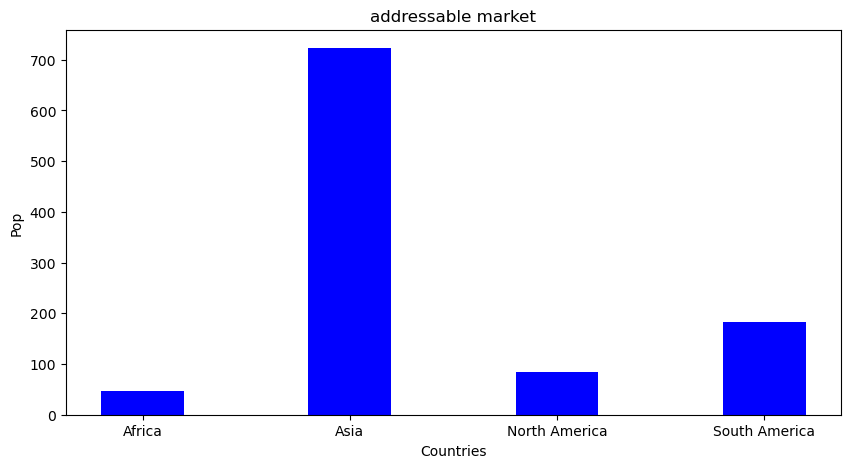

In [394]:
# South America has the highest ranking 
pop_by_continent = pd.DataFrame(table_2.groupby('Continent')['real pop in Millions'].sum()).reset_index()
pop
#pd.DataFrame(points_by_continent).reset_index()
# creating the dataset
data = pop_by_continent
courses = pop_by_continent['Continent']
values = pop_by_continent['real pop in Millions']
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Countries")
plt.ylabel("Pop")
plt.title("addressable market")
plt.show()

In [395]:
tax

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5641740,Arab World,ARB,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,42.885714
5641789,Caribbean small states,CSS,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,36.484615
5641836,Central Europe and the Baltics,CEB,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,39.836364
5641881,East Asia & Pacific (all income levels),EAS,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,34.617241
5641958,East Asia & Pacific (developing only),EAP,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,35.861905
...,...,...,...,...,...,...
5656170,Vietnam,VNM,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,39.400000
5656232,West Bank and Gaza,WBG,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,15.300000
5656303,"Yemen, Rep.",YEM,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,33.100000
5656380,Zambia,ZMB,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,18.600000


Here we can see that Asia and South Africa have the two most viable for our final decision

## Problem 3

In [396]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 13
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country Name                  12 non-null     object 
 1   real pop in Millions          12 non-null     float64
 2   Continent                     12 non-null     object 
 3   Phones (per 1000)             12 non-null     object 
 4   GDP ($ per capita)            12 non-null     float64
 5   GDP                           12 non-null     float64
 6   Human Development Index       12 non-null     float64
 7   Development Status            12 non-null     object 
 8   Cost of Living Index          12 non-null     float64
 9   Local Purchasing Power Index  12 non-null     float64
 10  Quality of Life Index         9 non-null      float64
 11  latitude                      12 non-null     float64
 12  longitude                     12 non-null     float64
 13  IncomeG

In [397]:
final = pd.merge(table_2, tax, how='left', left_on='Country Name', right_on='CountryName')
final
final = final[final['Value'].notna()]

In [398]:
final

,Country Name,real pop in Millions,Continent,Phones (per 1000),GDP ($ per capita),GDP,Human Development Index,Development Status,Cost of Living Index,Local Purchasing Power Index,...,latitude,longitude,IncomeGroup,ranking,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,South Africa,26.16,Africa,"107,0",10700.0,4.728077e+11,0.705,Developed/Developing,42.87,73.61,...,-30.559482,22.937506,Upper middle income,10863.415,South Africa,ZAF,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,28.8
1,Mexico,72.15,North America,"181,6",9000.0,9.670457e+11,0.767,Developed/Developing,35.72,41.81,...,23.634501,-102.552784,Upper middle income,9125.407,Mexico,MEX,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,51.7
2,Brazil,130.54,South America,"225,3",7600.0,1.429395e+12,0.761,Developed/Developing,40.22,32.81,...,-14.235004,-51.925280,Upper middle income,7699.001,Brazil,BRA,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,69.2
3,Thailand,25.39,Asia,"108,9",7400.0,4.782738e+11,0.765,Developed/Developing,49.77,35.45,...,15.870032,100.992541,Upper middle income,7488.325,Thailand,THA,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,27.5
5,Colombia,28.10,South America,"176,2",6300.0,2.746361e+11,0.761,Developed/Developing,30.66,31.12,...,4.570868,-74.297333,Upper middle income,6407.051,Colombia,COL,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,69.7
6,Peru,17.10,South America,"79,5",5100.0,1.443433e+11,0.759,Developed/Developing,38.65,33.95,...,-9.189967,-75.015152,Upper middle income,5181.519,Peru,PER,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,35.9
7,China,629.94,Asia,"266,7",5000.0,6.569869e+12,0.758,Developed/Developing,40.04,60.88,...,35.861660,104.195397,Upper middle income,5124.408,China,CHN,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,67.8
8,Jordan,5.65,Asia,"104,5",4300.0,2.539907e+10,0.723,Developed/Developing,53.67,34.88,...,30.585164,36.238414,Upper middle income,4394.333,Jordan,JOR,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,29.5
9,Ecuador,7.19,South America,"125,6",3300.0,4.470678e+10,0.758,Developed/Developing,40.98,36.08,...,-1.831239,-78.183406,Upper middle income,3420.998,Ecuador,ECU,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,33.0
10,Algeria,20.71,Africa,"78,1",6000.0,1.975805e+11,0.759,Developed/Developing,30.10,28.69,...,28.033886,1.659626,Upper middle income,NaN,Algeria,DZA,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,72.7


In [399]:
positive=['real pop in Millions',
          'Phones (per 1000)',
          'GDP ($ per capita)',
          'Human Development Index',
          'Local Purchasing Power Index',
          'Quality of Life Index',
          'ranking']


negative=['Cost of Living Index','Value']

In [400]:
#now we rank all the positive values

# Calculate the rank
ranks_df = final[positive].rank(method='dense')

# Sum up the ranks across all variables to get a total rank for each country
positive_df = ranks_df.sum(axis=1)

# Add the country column to the dataframe
positive_df = pd.DataFrame({'Country': final['Country Name'], 'Points': positive_df})

# Sort the dataframe by the total points and remove the index
positive_df = positive_df.sort_values(by='Points', ascending=False).reset_index(drop=True)

# Display the final ranking
print(positive_df)

               Country  Points
0               Mexico    59.0
1         South Africa    53.0
2               Brazil    49.0
3                China    46.0
4             Thailand    41.0
5             Colombia    41.0
6                 Peru    37.0
7              Ecuador    31.0
8              Algeria    30.0
9                 Iraq    25.0
10  Dominican Republic    25.0
11              Jordan    22.0


In [401]:
#here we rank all the negative values

# Calculate the rank
ranks_df = final[negative].rank(method='dense')

# Sum up the ranks across all variables to get a total rank for each country
negative_df = ranks_df.sum(axis=1)

# Add the country column to the dataframe
negative_df = pd.DataFrame({'Country': final['Country Name'], 'Points': negative_df})

# Sort the dataframe by the total points and remove the index
negative_df = negative_df.sort_values(by='Points', ascending=True).reset_index(drop=True)

# Display the final ranking
print(negative_df)


               Country  Points
0                 Iraq     7.0
1                 Peru    10.0
2               Mexico    11.0
3         South Africa    12.0
4             Thailand    12.0
5             Colombia    13.0
6              Ecuador    13.0
7              Algeria    13.0
8                China    15.0
9               Jordan    16.0
10              Brazil    17.0
11  Dominican Republic    17.0


In [402]:
final

,Country Name,real pop in Millions,Continent,Phones (per 1000),GDP ($ per capita),GDP,Human Development Index,Development Status,Cost of Living Index,Local Purchasing Power Index,...,latitude,longitude,IncomeGroup,ranking,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,South Africa,26.16,Africa,"107,0",10700.0,4.728077e+11,0.705,Developed/Developing,42.87,73.61,...,-30.559482,22.937506,Upper middle income,10863.415,South Africa,ZAF,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,28.8
1,Mexico,72.15,North America,"181,6",9000.0,9.670457e+11,0.767,Developed/Developing,35.72,41.81,...,23.634501,-102.552784,Upper middle income,9125.407,Mexico,MEX,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,51.7
2,Brazil,130.54,South America,"225,3",7600.0,1.429395e+12,0.761,Developed/Developing,40.22,32.81,...,-14.235004,-51.925280,Upper middle income,7699.001,Brazil,BRA,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,69.2
3,Thailand,25.39,Asia,"108,9",7400.0,4.782738e+11,0.765,Developed/Developing,49.77,35.45,...,15.870032,100.992541,Upper middle income,7488.325,Thailand,THA,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,27.5
5,Colombia,28.10,South America,"176,2",6300.0,2.746361e+11,0.761,Developed/Developing,30.66,31.12,...,4.570868,-74.297333,Upper middle income,6407.051,Colombia,COL,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,69.7
6,Peru,17.10,South America,"79,5",5100.0,1.443433e+11,0.759,Developed/Developing,38.65,33.95,...,-9.189967,-75.015152,Upper middle income,5181.519,Peru,PER,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,35.9
7,China,629.94,Asia,"266,7",5000.0,6.569869e+12,0.758,Developed/Developing,40.04,60.88,...,35.861660,104.195397,Upper middle income,5124.408,China,CHN,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,67.8
8,Jordan,5.65,Asia,"104,5",4300.0,2.539907e+10,0.723,Developed/Developing,53.67,34.88,...,30.585164,36.238414,Upper middle income,4394.333,Jordan,JOR,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,29.5
9,Ecuador,7.19,South America,"125,6",3300.0,4.470678e+10,0.758,Developed/Developing,40.98,36.08,...,-1.831239,-78.183406,Upper middle income,3420.998,Ecuador,ECU,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,33.0
10,Algeria,20.71,Africa,"78,1",6000.0,1.975805e+11,0.759,Developed/Developing,30.10,28.69,...,28.033886,1.659626,Upper middle income,NaN,Algeria,DZA,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,72.7


In [403]:
# lasty we sort the final
ex = pd.merge(final['Country Name'],negative_df, how='inner', left_on='Country Name', right_on= 'Country')
ex
ex = pd.merge(ex,positive_df, how='inner', left_on='Country Name', right_on= 'Country')
ex['total score'] = ex['Points_y']-ex['Points_x']
ex.sort_values(by='total score', ascending=False)

,Country Name,Country_x,Points_x,Country_y,Points_y,total score
1,Mexico,Mexico,11.0,Mexico,59.0,48.0
0,South Africa,South Africa,12.0,South Africa,53.0,41.0
2,Brazil,Brazil,17.0,Brazil,49.0,32.0
6,China,China,15.0,China,46.0,31.0
3,Thailand,Thailand,12.0,Thailand,41.0,29.0
4,Colombia,Colombia,13.0,Colombia,41.0,28.0
5,Peru,Peru,10.0,Peru,37.0,27.0
8,Ecuador,Ecuador,13.0,Ecuador,31.0,18.0
10,Iraq,Iraq,7.0,Iraq,25.0,18.0
9,Algeria,Algeria,13.0,Algeria,30.0,17.0


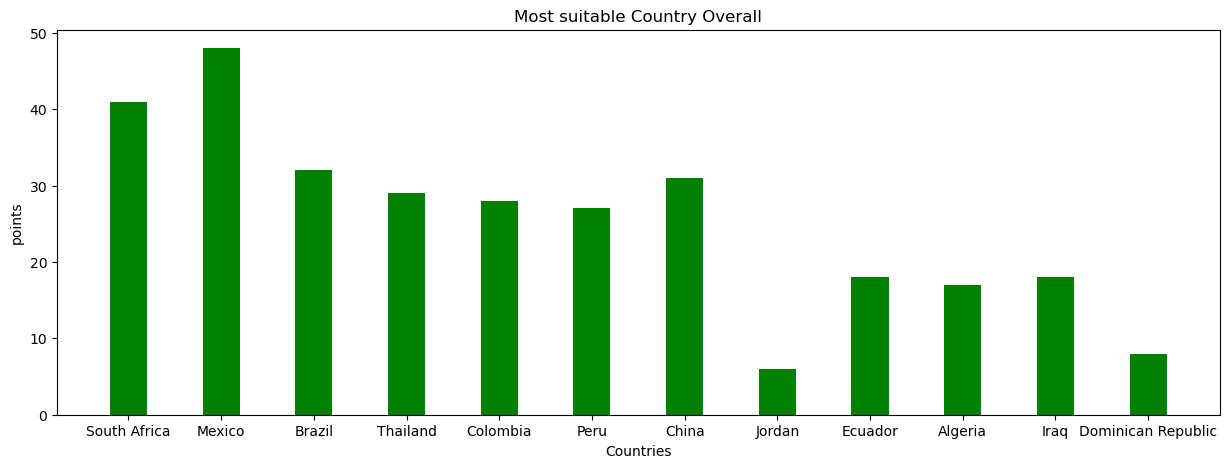

In [405]:
# creating the dataset
data = ex
country = ex['Country Name']
points = ex['total score']
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(country, points, color ='green',
        width = 0.4)
 
plt.xlabel("Countries")
plt.ylabel("points")
plt.title("Most suitable Country Overall")
plt.show()
